<a href="https://colab.research.google.com/github/TarunvelVS/GenAI_DL_NLP_Projects/blob/main/Holiday_Season_Image_Clasification_CNN%20(HackerEarth).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'hackerearth-deep-learning-challenge-holidayseason:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1067807%2F1796699%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240612%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240612T035533Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1dce61e90381cb140ec246418baedd0a7f7b8ae2b6b1903d4ec5a2af71057f973b096db8cf3cdda2adb3369ea5a78a0fe8ba54fd3cc15fb2c67801785c2f8c5295ae9c3059691428b064c6a92b99331a69f769c5a0d71b5415341d126d69d314ecc040c33d3b315c72fe7eabc676da2539fc03ba51985a8085141da127893ea0b6e597ed9758ca9033295ced4d9e9b725c9a4b767fd7acb0ae87fdf54b32ea1607d8e8504448365911b07b445f999e87ae828191713bcc55ed7a7ae1d275167caacf23fe862256a2a171a7fc392bf756fb23f94965cc19714bce57bb6f7d5a6a9ffd7758b1a418abbcc5beb85d32b8083455ff8aa70b3e3642be33b5252e5a15'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 33188273 bytes downloaded
Downloaded and uncompressed: hackerearth-deep-learning-challenge-holidayseason
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train/image5712.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train/image7277.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train/image7739.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train/image5795.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train/image699.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train/image7571.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train/image1631.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train/image7027.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train/image5936.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train/image1391.jpg
/kaggle/input/hackerearth-deep

## **Data Loading and Exploration**

In [3]:
#Importing Necessary Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import os

In [5]:
train_df = pd.read_csv('/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train.csv')
train_df.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6469 entries, 0 to 6468
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   6469 non-null   object
 1   Class   6469 non-null   object
dtypes: object(2)
memory usage: 101.2+ KB


<Axes: xlabel='Class'>

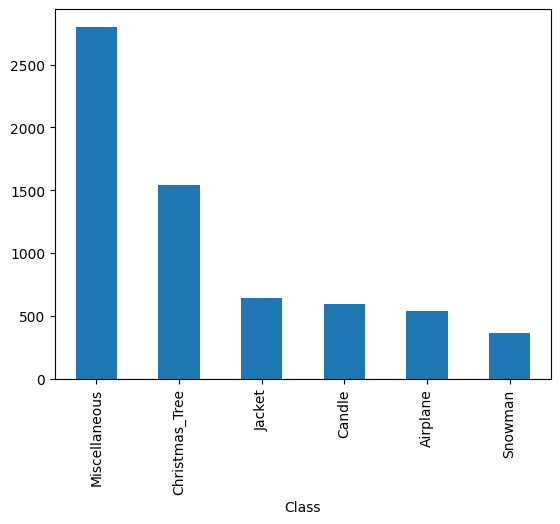

In [7]:
train_df["Class"].value_counts().plot(kind="bar")

## **Data Augmentation**

Data augmentation is the process of artificially generating new data from existing data, primarily to train new machine learning (ML) models.

Data augmentation helps in increasing the diversity of the training data without actually collecting new data. This can help in preventing overfitting and improve the generalization of the model.

We'll create an instance of `ImageDataGenerator` with various augmentation techniques and rescale the images.

In [8]:
# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

1. `rescale`=1./255: Normalizes the pixel values to the range [0, 1].
2. `rotation_range`: Randomly rotates the images within the specified degree range.
3. `width_shift_range` & `height_shift_range`: Randomly shifts the images horizontally and vertically.
4. `shear_range`: Randomly applies shearing transformations.
5. `zoom_range`: Randomly zooms inside pictures.
6. `horizontal_flip`: Randomly flips the images horizontally.
7. `fill_mode`: Points outside the boundaries of the input are filled according to the given mode.

In [9]:
# One-hot encode the labels
label_binarizer = LabelBinarizer()
train_df['label'] = label_binarizer.fit_transform(train_df['Class']).tolist()

In [10]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

In [11]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory = "/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train/",
    x_col='Image',
    y_col='Class',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory = "/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train/",
    x_col='Image',
    y_col='Class',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 5175 validated image filenames belonging to 6 classes.
Found 1294 validated image filenames belonging to 6 classes.


### **CNN Model**

In [12]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = "relu", input_shape=(150, 150, 3)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [16]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Epoch 1/20
162/162 [==============================] - 347s 2s/step - loss: 0.9755 - accuracy: 0.6398 - val_loss: 0.9809 - val_accuracy: 0.6453
Epoch 2/20
162/162 [==============================] - 336s 2s/step - loss: 0.9464 - accuracy: 0.6512 - val_loss: 0.9850 - val_accuracy: 0.6376
Epoch 3/20
162/162 [==============================] - 325s 2s/step - loss: 0.9329 - accuracy: 0.6564 - val_loss: 0.9458 - val_accuracy: 0.6515
Epoch 4/20
162/162 [==============================] - 337s 2s/step - loss: 0.9168 - accuracy: 0.6692 - val_loss: 0.9728 - val_accuracy: 0.6453
Epoch 5/20
162/162 [==============================] - 324s 2s/step - loss: 0.9100 - accuracy: 0.6595 - val_loss: 0.9034 - val_accuracy: 0.6692
Epoch 6/20
162/162 [==============================] - 348s 2s/step - loss: 0.8825 - accuracy: 0.6738 - val_loss: 0.9032 - val_accuracy: 0.6716
Epoch 7/20
162/162 [==============================] - 318s 2s/step - loss: 0.8603 - accuracy: 0.6848 - val_loss: 0.8937 - val_accuracy: 0.6801

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
test_dir = '../input/hackerearth-deep-learning-challenge-holidayseason/dataset/test/'

In [36]:
# Initialize lists to hold filenames and predictions
Image = []
prediction = []

# List of class labels (ensure this matches your actual class labels)
classes = ['Miscellaneous', 'Christmas_Tree', 'Jacket', 'Candle', 'Airplane', 'Snowman']

# Loop through the test directory, load and preprocess images, and make predictions
for i, file in enumerate(os.listdir(test_dir)):
    Image.append(file)
    file_path = os.path.join(test_dir, file)

    img = image.load_img(file_path, target_size=(150, 150))  # Ensure target size is (150, 150)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match the input shape (1, 150, 150, 3)
    img = img / 255.0  # Normalize the image

    pred = model.predict(img)
    prediction.append(classes[np.argmax(pred)])

results_df = pd.DataFrame({
    'filename': Image,
    'predicted_category': prediction
})

1/1 [==============================] - 0s 44ms/step


In [37]:
# Save the predictions to a CSV file
results_df.to_csv('submissions.csv', index=False)